# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

## Monte Carlo Simulation for Optimization Search


We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
# Download and get Daily Returns #znga,gm,goog,dal,amzn,dis,aapl
znga = pd.read_csv('ZNGA_CLOSE',index_col='Date',parse_dates=True)
gm = pd.read_csv('GM_CLOSE',index_col='Date',parse_dates=True)
goog = pd.read_csv('GOOG_CLOSE',index_col='Date',parse_dates=True)
dal = pd.read_csv('DAL_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)
dis = pd.read_csv('DIS_CLOSE',index_col='Date',parse_dates=True)
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)

In [103]:
znga_ac = znga['Adj Close']   
gm_ac = gm['Adj Close']  
goog_ac = goog['Adj Close'] 
dal_ac = dal['Adj Close'] 
amzn_ac = amzn['Adj Close'] 
dis_ac = dis['Adj Close'] 
aapl_ac = aapl['Adj Close'] 

In [104]:
stocks = pd.concat([znga_ac,gm_ac,goog_ac,dal_ac,amzn_ac,dis_ac,aapl_ac],axis=1)

In [105]:
# = pd.concat([znga,gm,goog,dal,amzn,dis,aapl],axis=1)
stocks.columns = ['znga','gm','goog','dal','amzn','dis','aapl']

In [106]:
stocks.head()

,znga,gm,goog,dal,amzn,dis,aapl
Date,,,,,,,
2018-12-31,3.93,31.713224,1035.609985,48.247189,1501.969971,108.326126,154.618546
2019-01-02,3.98,31.893360,1045.849976,48.430889,1539.130005,107.654343,154.794983
2019-01-03,3.92,30.575533,1016.059998,44.099281,1500.280029,105.046211,139.376251
2019-01-04,4.02,31.599455,1070.709961,46.207077,1575.390015,108.286606,145.326126
2019-01-07,4.07,32.575977,1068.390015,46.265083,1629.510010,109.225136,145.002686


In [107]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

znga    0.002595
gm     -0.000141
goog    0.001133
dal    -0.000705
amzn    0.001906
dis     0.000382
aapl    0.002536
dtype: float64

In [108]:
stocks.pct_change(1).corr()

,znga,gm,goog,dal,amzn,dis,aapl
znga,1.000000,0.262884,0.486693,0.161129,0.519604,0.381430,0.490106
gm,0.262884,1.000000,0.570856,0.707366,0.380936,0.665575,0.586769
goog,0.486693,0.570856,1.000000,0.421642,0.678539,0.618849,0.775159
dal,0.161129,0.707366,0.421642,1.000000,0.226767,0.607220,0.469609
amzn,0.519604,0.380936,0.678539,0.226767,1.000000,0.441851,0.659370
dis,0.381430,0.665575,0.618849,0.607220,0.441851,1.000000,0.608611
aapl,0.490106,0.586769,0.775159,0.469609,0.659370,0.608611,1.000000


# Simulating Thousands of Possible Allocations

In [109]:
stocks.head()
stocks.tail()

,znga,gm,goog,dal,amzn,dis,aapl
Date,,,,,,,
2020-06-26,9.58,24.459999,1359.900024,26.910000,2692.870117,109.099998,353.630005
2020-06-29,9.56,25.299999,1394.969971,28.610001,2680.379883,111.519997,361.779999
2020-06-30,9.54,25.299999,1413.609985,28.049999,2758.820068,111.510002,364.799988
2020-07-01,9.76,24.959999,1438.040039,27.700001,2878.699951,113.010002,364.109985
2020-07-02,9.53,25.240000,1464.699951,27.719999,2890.300049,112.180000,364.109985


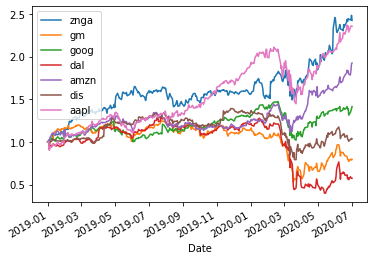

In [110]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [111]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,znga,gm,goog,dal,amzn,dis,aapl
Date,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.012723,0.005680,0.009888,0.003807,0.024741,-0.006201,0.001141
2019-01-03,-0.015075,-0.041320,-0.028484,-0.089439,-0.025242,-0.024227,-0.099607
2019-01-04,0.025510,0.033488,0.053786,0.047797,0.050064,0.030847,0.042689
2019-01-07,0.012438,0.030903,-0.002167,0.001255,0.034353,0.008667,-0.002226


## Log Returns vs Arithmetic Returns

We will now switch over to using log returns instead of arithmetic returns, for many of our use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that.
Log returns are convenient to work with in many of the algorithms we will encounter.

For a full analysis of why we use log returns, check [this great article](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).


In [112]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()   

,znga,gm,goog,dal,amzn,dis,aapl
Date,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.012642,0.005664,0.009839,0.003800,0.024440,-0.006221,0.001140
2019-01-03,-0.015190,-0.042198,-0.028898,-0.093694,-0.025566,-0.024525,-0.104924
2019-01-04,0.025190,0.032940,0.052390,0.046689,0.048851,0.030381,0.041803
2019-01-07,0.012361,0.030435,-0.002169,0.001255,0.033776,0.008630,-0.002228


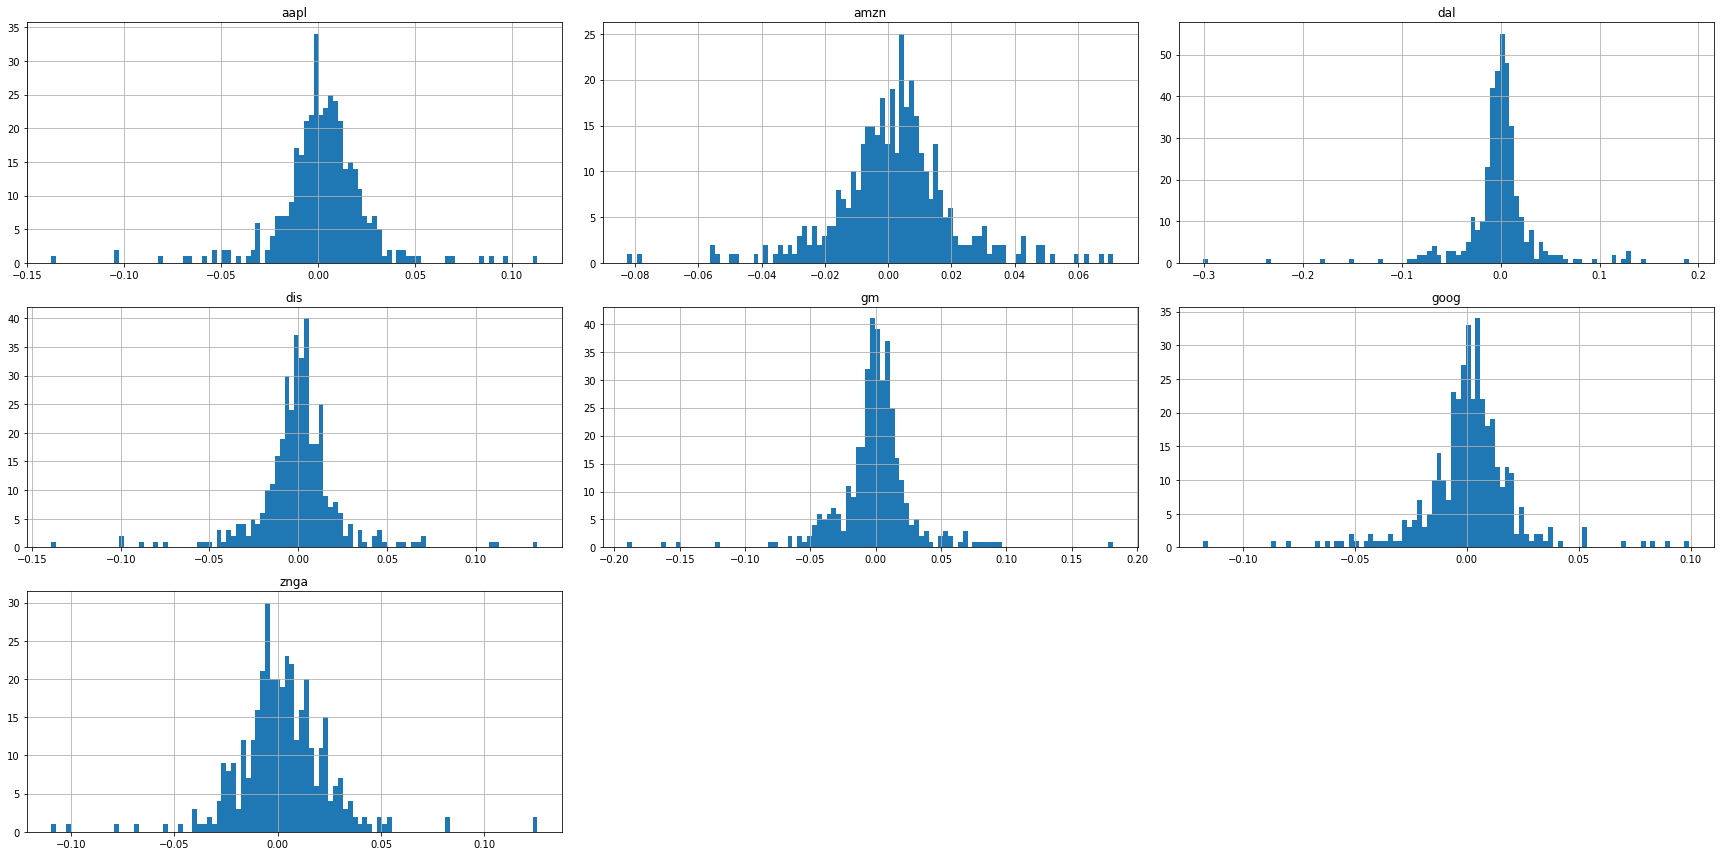

In [113]:
log_ret.hist(bins=100,figsize=(24,12));
plt.tight_layout()

In [114]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
znga,379.0,0.002337,0.022562,-0.109610,-0.008237,0.001596,0.013360,0.125600
gm,379.0,-0.000602,0.030519,-0.190227,-0.010169,0.000525,0.010571,0.181848
goog,379.0,0.000915,0.020937,-0.117667,-0.006306,0.001476,0.009942,0.099380
dal,379.0,-0.001462,0.039278,-0.301003,-0.009876,0.000175,0.009522,0.190762
amzn,379.0,0.001727,0.018825,-0.082535,-0.007163,0.002080,0.010433,0.071196
dis,379.0,0.000092,0.024094,-0.139085,-0.008111,0.000463,0.009143,0.134639
aapl,379.0,0.002260,0.023445,-0.137708,-0.006798,0.002733,0.012811,0.113157


In [115]:
log_ret.mean() * 252

znga    0.588979
gm     -0.151801
goog    0.230497
dal    -0.368481
amzn    0.435237
dis     0.023244
aapl    0.569490
dtype: float64

In [116]:
# Compute pairwise covariance of columns
log_ret.cov()

,znga,gm,goog,dal,amzn,dis,aapl
znga,0.000509,0.000191,0.000235,0.000150,0.000224,0.000215,0.000266
gm,0.000191,0.000931,0.000368,0.000854,0.000223,0.000487,0.000423
goog,0.000235,0.000368,0.000438,0.000347,0.000270,0.000314,0.000382
dal,0.000150,0.000854,0.000347,0.001543,0.000173,0.000571,0.000432
amzn,0.000224,0.000223,0.000270,0.000173,0.000354,0.000205,0.000292
dis,0.000215,0.000487,0.000314,0.000571,0.000205,0.000581,0.000346
aapl,0.000266,0.000423,0.000382,0.000432,0.000292,0.000346,0.000550


In [117]:
log_ret.cov()*252 # multiply by days

,znga,gm,goog,dal,amzn,dis,aapl
znga,0.128280,0.048029,0.059273,0.037902,0.056546,0.054149,0.066980
gm,0.048029,0.234718,0.092659,0.215098,0.056234,0.122826,0.106485
goog,0.059273,0.092659,0.110463,0.087520,0.067948,0.079156,0.096357
dal,0.037902,0.215098,0.087520,0.388785,0.043486,0.143980,0.108971
amzn,0.056546,0.056234,0.067948,0.043486,0.089306,0.051577,0.073573
dis,0.054149,0.122826,0.079156,0.143980,0.051577,0.146290,0.087255
aapl,0.066980,0.106485,0.096357,0.108971,0.073573,0.087255,0.138511


In [149]:
np.random.seed(101)
print(stocks.columns)

weights = np.array(np.random.random(7))

print("Random Weights:")


print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

#Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum( (log_ret.mean() * weights) * 252)
print(exp_ret)
#Expected Volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
print(exp_vol)
print('\n')
#Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['znga', 'gm', 'goog', 'dal', 'amzn', 'dis', 'aapl'], dtype='object')
Random Weights:
Rebalance
[0.16587379 0.18330566 0.00914628 0.05509493 0.22011965 0.26785824
 0.09860144]
Expected Portfolio Return
0.20985981556273367
Expected Volatility
0.30016880308297045


Sharpe Ratio
0.69913932896193


In [150]:
np.random.seed(101)

num_ports = 15000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):


    #weights
    weights = np.array(np.random.random(7))
    weights = weights/np.sum(weights)

    #save weights
    all_weights[ind,:] = weights

    #Expected Return

    ret_arr[ind] = np.sum( (log_ret.mean() * weights) * 252)

    #Expected Volatility

    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    #Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]



In [151]:
sharpe_arr.max()

1.6406798039170085

In [152]:
sharpe_arr.argmax()

9857

In [153]:
all_weights[9857,:]


array([0.39029985, 0.06004406, 0.01503654, 0.00891347, 0.21561168,
       0.03366182, 0.27643257])

In [154]:
max_sr_ret = ret_arr[9857]
max_sr_vol =  vol_arr[9857] 

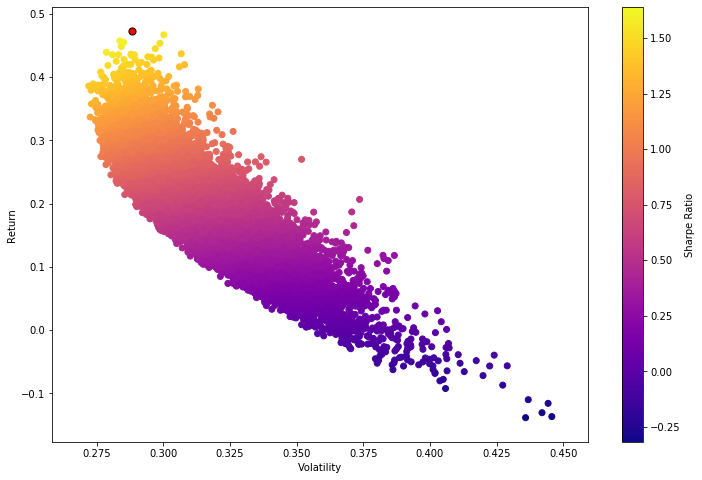

In [155]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='red', s=50,edgecolors='black')

## Single Run for Some Random Allocation

Great! Now we can just run this many times over!

## Plotting the data

# Mathematical Optimization

There are much better ways to find good allocation weights than just guess and check! We can use optimization functions to find the ideal weights mathematically!

### Functionalize Return and SR operations

In [156]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [157]:
from scipy.optimize import minimize

To fully understand all the parameters, check out:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [127]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [167]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [168]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [169]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [170]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [171]:
# Initial Guess (equal distribution)
init_guess = [0.143,0.143,0.143,0.143,0.143,0.143,0.142]

In [172]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [173]:
opt_results

     fun: -1.8593581889658812
     jac: array([ 2.08511949e-04,  1.96145509e+00,  7.68456042e-01,  2.54950821e+00,
        2.32309103e-05,  1.28173777e+00, -3.37004662e-04])
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.47038109, 0.        , 0.        , 0.        , 0.22325346,
       0.        , 0.30636544])

In [180]:
opt_results.x

array([0.47038109, 0.        , 0.        , 0.        , 0.22325346,
       0.        , 0.30636544])

In [181]:
get_ret_vol_sr(opt_results.x)   

array([0.54868468, 0.29509359, 1.85935819])

# All Optimal Portfolios (Efficient Frontier)

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

Efficient Frontier http://www.investopedia.com/terms/e/efficientfrontier

In [182]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.5,100) # Change 100 to a lower number for slower computers!

In [183]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [184]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

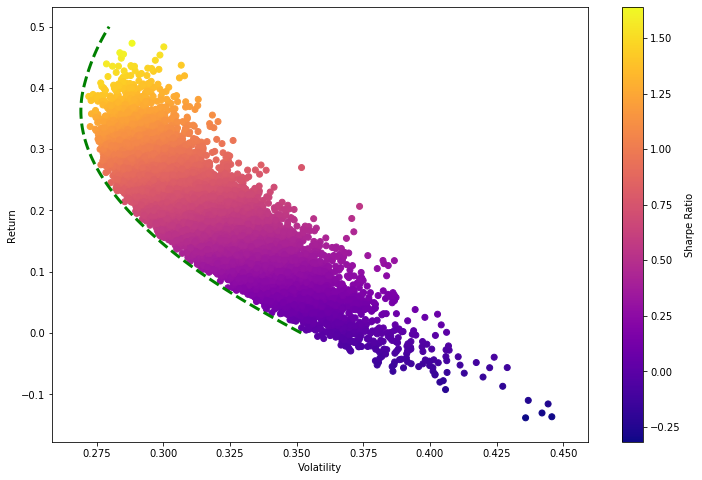

In [185]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# Great Job!